In [31]:
import pandas as pd
import numpy as np
from math import sqrt
from fbprophet import Prophet
from fbprophet.plot import plot_weekly
from matplotlib import pyplot
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error, mean_absolute_error
import locale
import datetime

ascii_cup ="""\
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \\
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \\
\_____________________/
"""

In [32]:
## Import our data
## Rename columns
## Change the type of our datetime col. to be datetime

df_past = pd.read_csv('Past_Data.csv')
df_past = df_past.rename(columns={"datetime_beginning_ept": "ds", "wind_generation_mw": "y"})
df_past['ds']=pd.to_datetime(df_past['ds'])

df_future = pd.read_csv('Actual_data.csv')
df_future = df_future.rename(columns={"datetime_beginning_ept": "ds", "wind_generation_mw": "y"})
df_future['ds']=pd.to_datetime(df_future['ds'])


In [33]:
## Create our model based on historical data
## Code insp./source: https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3


model = Prophet(changepoint_prior_scale=0.80,
                  daily_seasonality=True, 
                  weekly_seasonality=True,
                  yearly_seasonality=True
                 ).add_seasonality(name='hourly',
                                   period=0.04167,
                                   fourier_order=20
                                  )
                                   
                                   
                                   
print("This is going to take a while..")
print("Go get a cup of tea while you wait..")
print(ascii_cup)
model.fit(df_past)
print("\ndone")

This is going to take a while..
Go get a cup of tea while you wait..
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \
\_____________________/


done


In [34]:
# a = plot_weekly(prophet)


In [35]:
forecast = model.predict(df=df_future)
print("done")

done


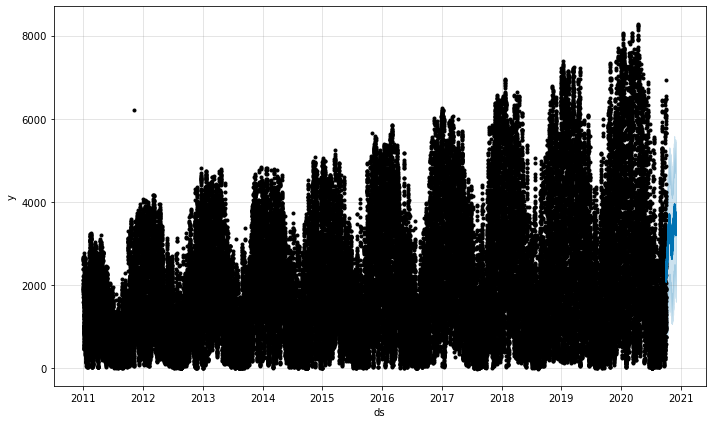

In [36]:
forecast_plot = model.plot(forecast)

In [37]:
MAE = mean_absolute_error(df_future['y'], forecast['yhat'])
RMSE = sqrt(mean_squared_error(df_future['y'], forecast['yhat']))

print("Prophet - root mean squared error:", RMSE)
print("Prophet - mean absolute error:", MAE)


Prophet - root mean squared error: 2219.5485131487735
Prophet - mean absolute error: 1887.363926429867


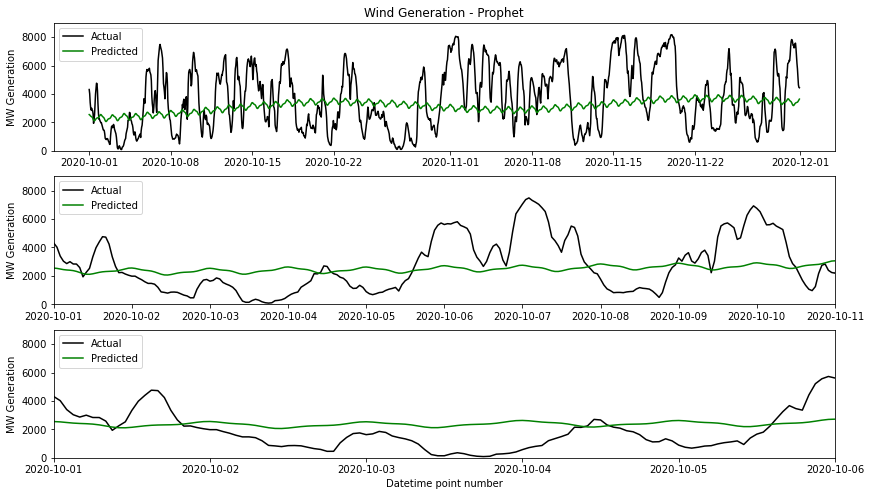

In [39]:
plot = pyplot.figure(figsize=(14,8))

ax1 = plot.add_subplot(311)
ax1.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax1.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax1.set_ylim(0,9000)
pyplot.ylabel('MW Generation')
pyplot.title('Wind Generation - Prophet')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')

#
ax2 = plot.add_subplot(312)
ax2.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax2.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax2.set_ylim(0,9000)
ax2.set_xlim([datetime.date(2020,10,1), datetime.date(2020,10,11)])
pyplot.ylabel('MW Generation')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')

#
ax3 = plot.add_subplot(313)
ax3.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax3.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax3.set_ylim(0,9000)
ax3.set_xlim([datetime.date(2020,10,1), datetime.date(2020,10,6)])
pyplot.xlabel('Datetime point number')
pyplot.ylabel('MW Generation')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')
pyplot.savefig('Prophet_2_Graph.png')